In [1]:
import glob
import pandas as pd
catf = glob.glob("train/train/cat.*.jpg")
catans = [0] * len(catf)
dogf = glob.glob("train/train/dog.*.jpg")
dogans = [1] * len(dogf)
df = pd.DataFrame({
    "path":catf + dogf,
    "ans":catans + dogans
})
df

,path,ans
0,train/train\cat.0.jpg,0
1,train/train\cat.1.jpg,0
2,train/train\cat.10.jpg,0
3,train/train\cat.100.jpg,0
4,train/train\cat.1000.jpg,0
...,...,...
24995,train/train\dog.9995.jpg,1
24996,train/train\dog.9996.jpg,1
24997,train/train\dog.9997.jpg,1
24998,train/train\dog.9998.jpg,1


In [2]:
from keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg.summary()

Using TensorFlow backend.
C:\Users\User\PycharmProjects\MLDemo\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\PycharmProjects\MLDemo\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\PycharmProjects\MLDemo\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\PycharmProjects

C:\Users\User\PycharmProjects\MLDemo\venv\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\PycharmProjects\MLDemo\venv\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\PycharmProjects\MLDemo\venv\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\PycharmProjects\MLDe



Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [3]:
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.layers import BatchNormalization
for l in vgg.layers:
    l.trainable = False
x = BatchNormalization()(vgg.output)
x = Flatten()(x)
x = Dense(4096, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(2, activation="softmax")(x)
cnn = Model(inputs=vgg.input, outputs=x)
cnn.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________

In [4]:
# 進到模型處理: numpy array
import numpy as np
x = np.array(df["path"])
y = np.array(pd.get_dummies(df["ans"]))

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size=0.1)

In [6]:
# only Demo: 藉由一張圖片告訴你如何處理
from keras.preprocessing.image import load_img
# 一定使用他當初的做法
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py
from keras.applications.vgg16 import preprocess_input
img = load_img(x_train[0], target_size=(224, 224)).convert("RGB")
img_np = np.array(img) 
preprocess_input(img_np)

array([[[ 72.061     ,  71.221     ,  92.32      ],
        [ 61.060997  ,  60.221     ,  81.32      ],
        [ 39.060997  ,  38.221     ,  55.32      ],
        ...,
        [139.061     , 129.22101   , 131.32      ],
        [132.061     , 128.22101   , 130.32      ],
        [131.061     , 130.22101   , 129.32      ]],

       [[ 70.061     ,  70.221     ,  89.32      ],
        [ 63.060997  ,  63.221     ,  82.32      ],
        [ 40.060997  ,  39.221     ,  56.32      ],
        ...,
        [136.061     , 129.22101   , 131.32      ],
        [131.061     , 127.221     , 129.32      ],
        [130.061     , 128.22101   , 129.32      ]],

       [[ 62.060997  ,  61.221     ,  78.32      ],
        [ 48.060997  ,  49.221     ,  65.32      ],
        [ 37.060997  ,  36.221     ,  53.32      ],
        ...,
        [131.061     , 125.221     , 127.32      ],
        [126.061     , 122.221     , 125.32      ],
        [125.061     , 121.221     , 127.32      ]],

       ...,

      

In [7]:
# return (原圖, 預處理過圖, 答案)
def get_images(batch, x, y):
    idx = np.random.randint(0, x.shape[0], batch)
    ori_img_list = []
    img_list = []
    for fp in x[idx]:
        img = load_img(fp, target_size=(224, 224)).convert("RGB")
        img_np = np.array(img) 
        img_pre = preprocess_input(img_np)
        img_list.append(img_pre)
        ori_img_list.append(img_np)
    img_list_np = np.array(img_list)
    ori_img_list_np = np.array(ori_img_list)
    return (ori_img_list_np, img_list_np, y[idx])

In [8]:
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [18]:
times = 5
for i in range(times):
    imgs = get_images(20, x_train, y_train)
    result = cnn.train_on_batch(imgs[1], imgs[2])
    print("-" * 15, "times", i + 1, "-" * 15)
    print("[Train]:", result)
    # 如果時間充裕, 最好多一點
    test_imgs = get_images(50, x_test, y_test)
    test_result = cnn.test_on_batch(test_imgs[1], test_imgs[2])
    print("[Validate]:", test_result)

--------------- times 1 ---------------
[Train]: [5.301713, 0.65]
[Validate]: [4.7834487, 0.64]
--------------- times 2 ---------------
[Train]: [2.8030448, 0.8]
[Validate]: [3.2237103, 0.8]
--------------- times 3 ---------------
[Train]: [4.6385827, 0.65]
[Validate]: [2.0652974, 0.86]
--------------- times 4 ---------------
[Train]: [1.6118095, 0.9]
[Validate]: [3.2758386, 0.76]
--------------- times 5 ---------------
[Train]: [0.80590487, 0.95]
[Validate]: [0.745672, 0.94]


In [22]:
cnn.predict(test_imgs[1])

array([[5.12985106e-11, 1.00000000e+00],
       [1.00000000e+00, 2.25287955e-13],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.06090833e-27, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.69195494e-06, 9.99998331e-01],
       [1.00000000e+00, 9.44195191e-23],
       [1.00000000e+00, 6.95330151e-15],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.56763077e-13],
       [1.70335291e-11, 1.00000000e+00],
       [3.08197921e-23, 1.00000000e+00],
       [1.00000000e+00, 1.54875383e-22],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.000000

In [19]:
test_imgs = get_images(200, x_test, y_test)
cnn.evaluate(test_imgs[1], test_imgs[2])

200/200 [==============================] - 22s 112ms/step


[0.908439933648333, 0.94]

In [20]:
f = get_images(50, x_test, y_test)
pre = cnn.predict(f[1]).argmax(axis=1)
pre

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1], dtype=int64)

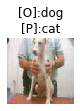

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
labels = ["cat", "dog"]
test = f[2].argmax(axis=1)
idx = np.nonzero(pre != test)[0]
false_img = f[0][idx]
false_answer = test[idx]
false_pre = pre[idx]

width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14, 4))
for i, img in enumerate(false_img):
    plt.subplot(height, width, i + 1)
    t = "[O]:" + labels[false_answer[i]] + "\n[P]:" + labels[false_pre[i]]
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)